In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [22]:
df = pd.read_csv('Spotify.csv')
df.head(10)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.30000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.01030,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.17300,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.02630,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.04080,0.001040,0.0845,0.879,172.656,pop
5,Sisqo,Thong Song,253733,True,1999,69,0.706,0.888,2,-6.959,1,0.0654,0.11900,0.000096,0.0700,0.714,121.549,"hip hop, pop, R&B"
6,Eminem,The Real Slim Shady,284200,True,2000,86,0.949,0.661,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.760,104.504,hip hop
7,Robbie Williams,Rock DJ,258560,False,2000,68,0.708,0.772,7,-4.264,1,0.0322,0.02670,0.000000,0.4670,0.861,103.035,"pop, rock"
8,Destiny's Child,Say My Name,271333,False,1999,75,0.713,0.678,5,-3.525,0,0.1020,0.27300,0.000000,0.1490,0.734,138.009,"pop, R&B"
9,Modjo,Lady - Hear Me Tonight,307153,False,2001,77,0.720,0.808,6,-5.627,1,0.0379,0.00793,0.029300,0.0634,0.869,126.041,Dance/Electronic


In [23]:
#En dans edilebilir şarkılar
danceability = df.sort_values('danceability', ascending=False)

#En enerjik  şarkılar
energy = df.sort_values('energy', ascending=False)

#En akustik 10 şarkı  
acousticness = (df.sort_values('acousticness', ascending=False)).head(10)

#En canlı 20 şarkı 
liveness = df.sort_values('liveness', ascending=False).head(20)

#Tempo songs
tempo_songs = df.sort_values('tempo', ascending=False)


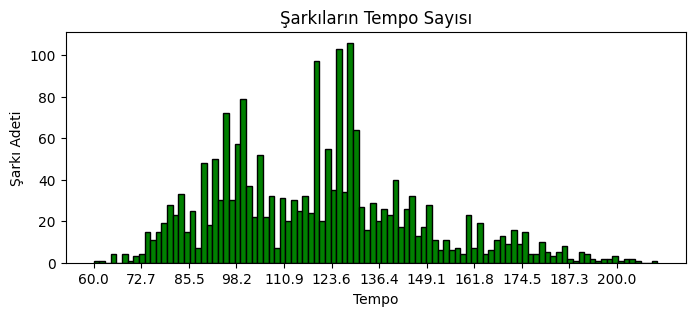

In [24]:
#Tempo Şarkılar Görselleştirilmesi
plt.figure(figsize=(8,3))
plt.hist(tempo_songs['tempo'], bins=100,color='green' ,edgecolor='black')
plt.xlabel('Tempo')
plt.ylabel('Şarkı Adeti')
plt.xticks(np.linspace(60, 200, 12))
plt.title('Şarkıların Tempo Sayısı')
plt.show()

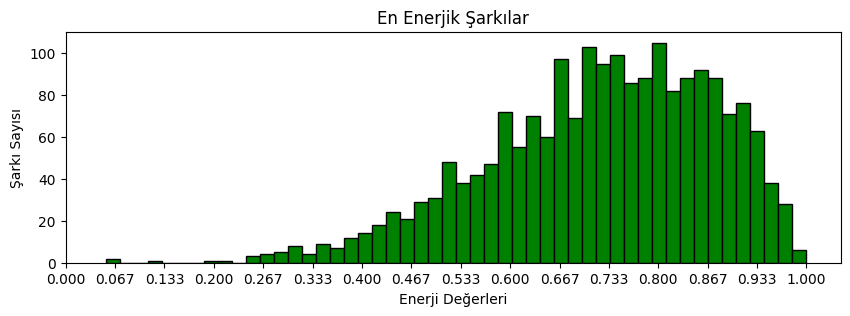

In [25]:
#Enerjik şarkılar Görselleştirilmesi
plt.figure(figsize=(10,3))
plt.hist(energy['energy'], bins=50,color='green' ,edgecolor='black')
plt.xlabel('Enerji Değerleri')
plt.ylabel('Şarkı Sayısı')
plt.xticks(np.linspace(0, 1, 16))
plt.title('En Enerjik Şarkılar')
plt.show()


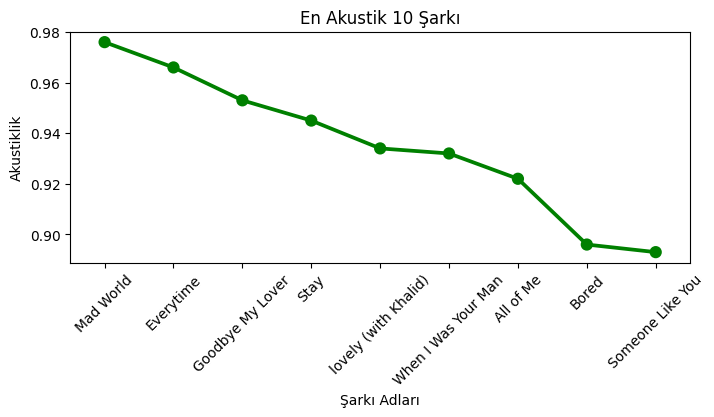

In [26]:
#Akustik 10 şarkı Görselleştirilmesi
plt.figure(figsize=(8,3))
sns.pointplot(x='song', y='acousticness', data=acousticness, color='green')
plt.xticks(rotation=45)
plt.xlabel('Şarkı Adları')
plt.ylabel('Akustiklik')
plt.title('En Akustik 10 Şarkı')
plt.show()


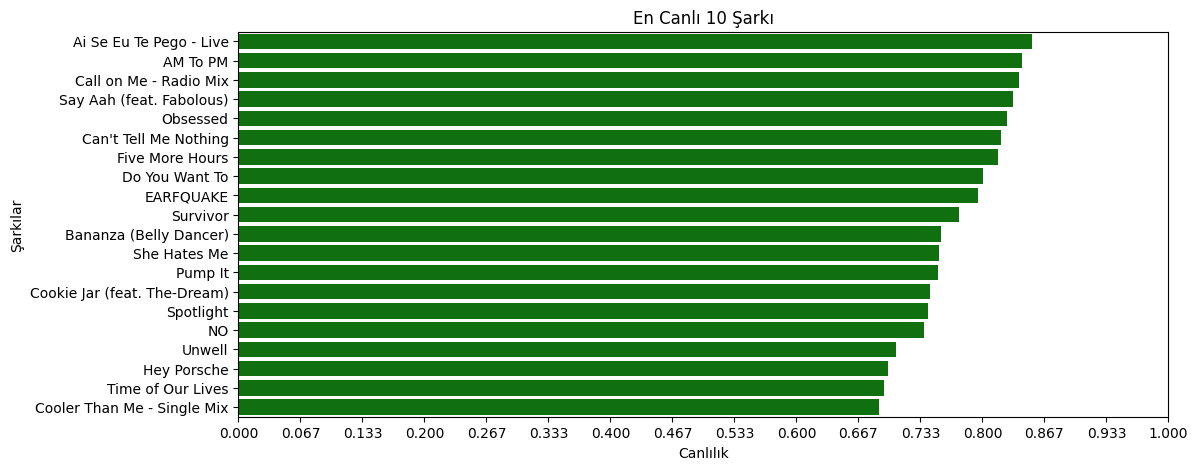

In [27]:
#En Canlı 10 şarkı Görselleştirilmesi
plt.figure(figsize=(12, 5))
sns.barplot(x=liveness['liveness'], y=liveness['song'], color='green', linewidth=5)
plt.xlabel('Canlılık')
plt.ylabel('Şarkılar')
plt.xticks(np.linspace(0, 1, 16))
plt.title('En Canlı 10 Şarkı')
plt.show()

Modelleme yapılarak en popüler şarkı tahmininde bulunma

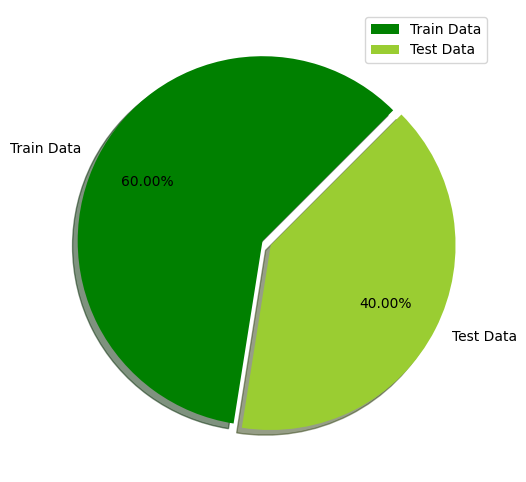

In [28]:
plt.figure(figsize=(6,6))
area = [60,40]
labels = ['Train Data', 'Test Data']
colors = ['green', 'yellowgreen']
plt.pie(area, labels= labels, colors= colors, startangle= 45, shadow= 'false', autopct= '%1.2f%%', pctdistance= 0.7, explode= [0,0.05])
plt.legend(loc='upper right')
plt.show()

In [29]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [30]:
X = df[df.columns[[2,4,6,7,8,9,10,11,13,14,15,16]]].values
y = df[df.columns[5]].values

In [31]:
def scale_dataset(dataframe, oversample=False):
   X = df[df.columns[[2,4,6,7,8,9,10,11,13,14,15,16]]].values
   y = df[df.columns[5]].values
   scaler = StandardScaler()
   X = scaler.fit_transform(X)

   if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

   data = np.hstack((X, np.reshape(y, (-1, 1))))

   return data, X, y

In [32]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [34]:
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [35]:
y_pred = knn_model.predict(X_test)

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       126
           1       0.82      1.00      0.90        31
           2       0.65      1.00      0.79        11
           3       1.00      1.00      1.00         5
           4       0.67      1.00      0.80         4
           6       0.50      1.00      0.67         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         1
          17       1.00      1.00      1.00         1
          18       1.00      1.00      1.00         1
          21       1.00      1.00      1.00         2
          24       1.00      1.00      1.00         1
          26       1.00      1.00      1.00         2
          27       1.00      1.00      1.00         2
          28       1.00      1.00      1.00         1
          30       0.67    

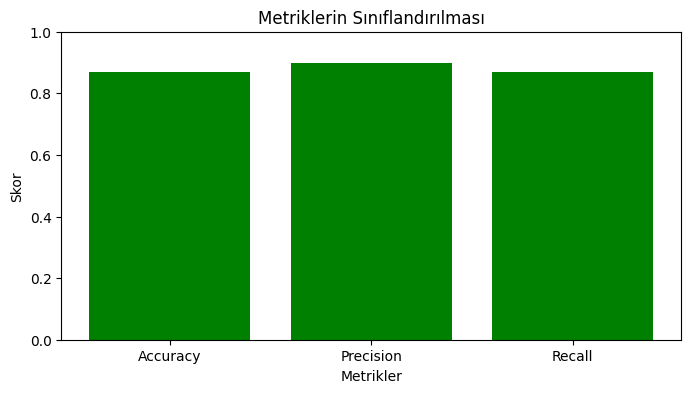

In [37]:
metrics = ['Accuracy', 'Precision', 'Recall']
values = [0.87, 0.90, 0.87]

plt.figure(figsize=(8, 4))
plt.bar(metrics, values, color='green', linewidth=3)
plt.xlabel('Metrikler')
plt.ylabel('Skor')
plt.title('Metriklerin Sınıflandırılması')
plt.ylim([0, 1])  # Y ekseni aralığını 0-1 olarak sınırlamak
plt.show()
